____
# RetainAI: Leveraging ML to Boost Customer Retention
___

## Business Problem

A telecom company is facing the issue of customer churn, which is negatively impacting their revenue and growth. They need to understand the factors contributing to churn and build a predictive model to identify high-risk customers, so they can take proactive steps to improve retention.

## Objective

The objective of this data science project is to:
1. Perform exploratory data analysis (EDA) to extract insights about churn from the dataset
2. Split the data into train/test sets and build a predictive model to forecast which customers are likely to churn 
3. Establish metrics to evaluate the model's performance
4. Discuss potential issues with deploying the churn prediction model into production

## About the Dataset

The dataset `Data_Science_Challenge.csv` contains information about the telecom company's customers, including:

\- Demographic data like state, area code, phone number

\- Account information like account length, international plan, voicemail plan

\- Usage metrics like total day/evening/night minutes and calls

\- Churn indicator (whether the customer churned or not)

_________

## Project Methodology

### 1. Exploratory Data Analysis: 

\- Analyze variables' distributions, outliers, missing values

\- Visualize relationships between features and the churn indicator

\- Extract insights to help feature selection and engineering

### 2. Data Preprocessing: 

\- Handle missing values, encode categorical variables, normalize numerical features

\- Use techniques like undersampling to create a balanced dataset for modeling

### 3. Feature Selection & Engineering:

\- Select most predictive features based on EDA insights and domain knowledge

\- Engineer new features as needed (e.g. usage ratios, account age buckets)

### 4. Model Building & Evaluation

\- Split data into train/test sets (e.g. 80/20 split)

\- Train models like logistic regression, decision trees, random forest

\- Use metrics like accuracy, precision, recall, F1-score, AUC to evaluate performance

\- Perform hyperparameter tuning and cross-validation to optimize models

### 5. Model Deployment Considerations:

\- Ensure model can handle new, unseen data (data drift)

\- Set up regular retraining pipeline as new data comes in

\- Monitor model performance in production using business metrics like churn rate

\- Consider model explainability needs for business users and regulators

By leveraging machine learning techniques, this project aims to build an effective churn prediction model that the telecom company can use to proactively engage high-risk customers and improve retention.

_______

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Overview of dataset

In [2]:
df = pd.read_csv('Data_Science_Challenge.csv') # loading dataset

df.head() # birdview of dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape # no. of rows & columns

(3333, 21)

In [4]:
df.info() # basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.isnull().sum() # null values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df.duplicated().sum() # duplicate values

0

## EDA

_________
\- We don't need phone number column, because it doesn matter, customer has what type of phone number.
So, lets remove it permentatly.
_________

In [7]:
df.drop(columns = ['phone number'], inplace = True)

__________
\- We are going to analyse each column throughly, to see if its important for modelling. 
_________
\- We will also try to understand the data in this process.
_________

**state**

In [8]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [9]:
df['state'].nunique()

51

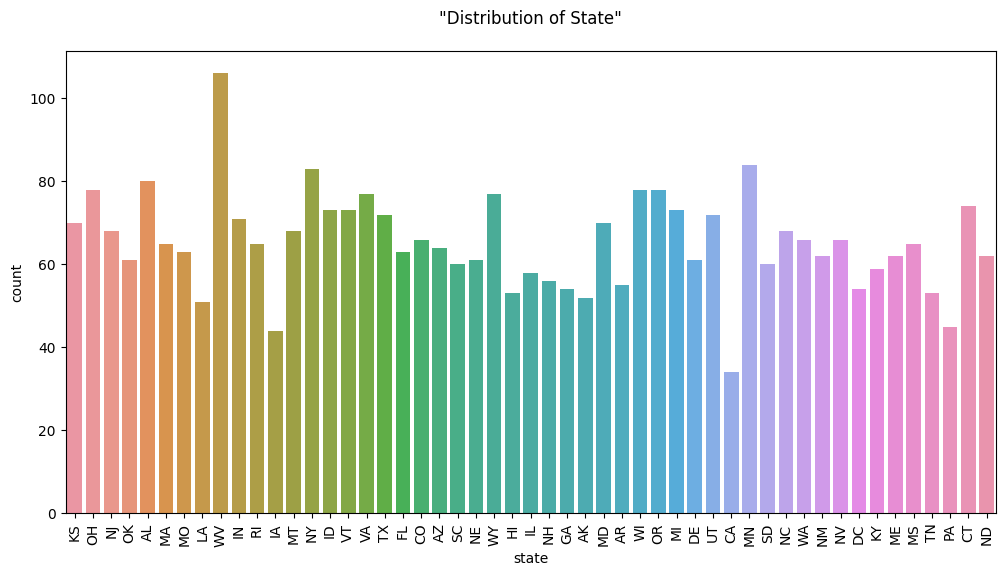

In [10]:
# distribution of 'state'

plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'state')
plt.xticks(rotation = 'vertical')
plt.title('"Distribution of State"', pad = 20);

_________
\- There are total 51 diffrent states.
_________
\- Among which 'WV'(106) is the most common state, and the least common state is 'CA' (34).
________
\- There is no clear pattern or trend in the distribution of counts across the states; the counts appear to be relatively random.
________

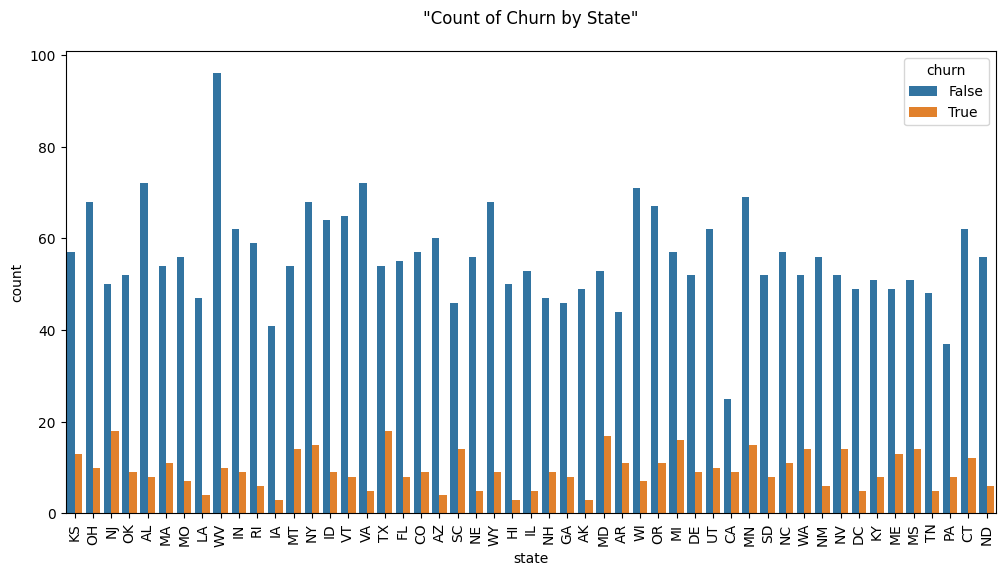

In [11]:
# relation with 'churn'

plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'state', hue = 'churn')
plt.xticks(rotation = 'vertical')
plt.title('"Count of Churn by State"', pad = 20);

In [12]:
# the proportion of churn for each state

crosstab_result = pd.crosstab(df['state'], df['churn'])

proportion_of_churn = (crosstab_result[True] / (crosstab_result[False] + crosstab_result[True])) * 100

In [13]:
proportion_of_churn.sort_values(ascending = False).head() # states with highest churn rate

state
NJ    26.470588
CA    26.470588
TX    25.000000
MD    24.285714
SC    23.333333
dtype: float64

In [14]:
proportion_of_churn.sort_values(ascending = False).tail() # states with lowest churn rate

state
IA    6.818182
VA    6.493506
AZ    6.250000
AK    5.769231
HI    5.660377
dtype: float64

___________
\- The churn rates vary across states, with some states having higher churn rates and others having lower rates.
_________
\- The highest churn rate appears to be around 26.50, it is of state 'NJ' & 'CA', while the lowest is close to 5.7 of state 'HI' & 'AK'.
__________

In [15]:
# statistical test - chi-square test 
from scipy.stats import chi2_contingency

# chi-square test for state and churn
crosstab_result = pd.crosstab(df['state'], df['churn'])
chi2, p_value, dof, expec = chi2_contingency(crosstab_result)
p_value

0.002296221552011188

__________
\- The p-value is less than 0.05, which means we reject the null hypothesis that the states and churn are independent.  
________
\- Chi-square test confirms that there is a relationship between state and churn.  
________

**international plan**

In [16]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

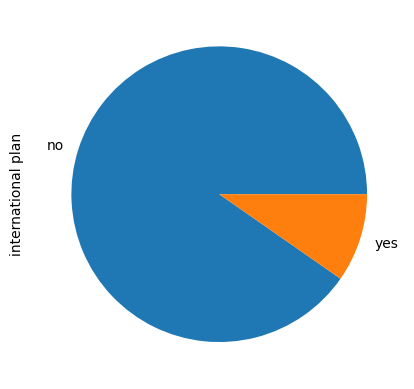

In [17]:
df['international plan'].value_counts().plot(kind = 'pie');

________
\- Outof 3333 records only few (323) have internation plan. But does this have relationship with churn ?
_______

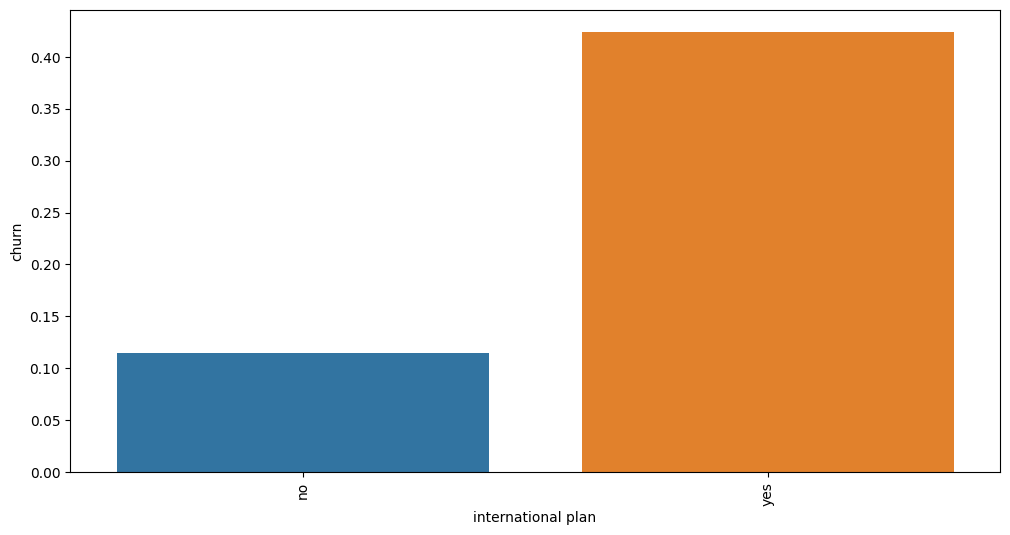

In [18]:
# Bivariate analysis of international plan with churn feature

plt.figure(figsize =(12, 6))
sns.barplot(data = df, x = 'international plan', y = 'churn', errorbar = None)
plt.xticks(rotation = 'vertical');

_________
\- The people who have international plan are about to churn more. 
________
\- This could be the reason to churn. 
________

**area code**

In [19]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

______
\- We have three unique area code. Let see how they are related to churn.
________

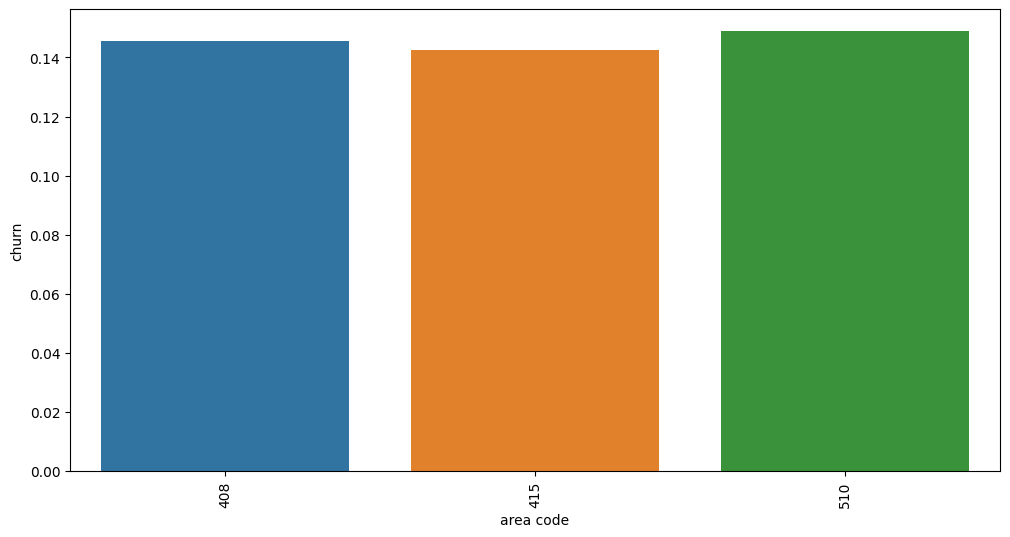

In [20]:
# Bivariate analysis of state with churn feature

plt.figure(figsize = (12, 6))
sns.barplot(data = df, x = 'area code', y = 'churn', errorbar = None)
plt.xticks(rotation = 'vertical');

_______
\- As we can see the area code has nothing to with if he or she is going to churn. Lets remove this feature. 
_______
\- This feature is not important.
_______
\- Lets apply chi square test to assert our conclusion.
_______

In [21]:
# statistical test - chi-square test
from scipy.stats import chi2_contingency

# chi-square test for area code and churn
crosstab_result = pd.crosstab(df['area code'], df['churn'])
chi2, p_value, dof, expec = chi2_contingency(crosstab_result)
p_value

0.9150556960243712

________
\- The p-value is greater than 0.05, which means we fail to reject the null hypothesis that the states and churn are independent.
_______
\- Chi-square test confirms that area code and churn column are independent means no relation.
______

In [22]:
df.drop(columns = ['area code'], inplace = True) 

________

**account length**

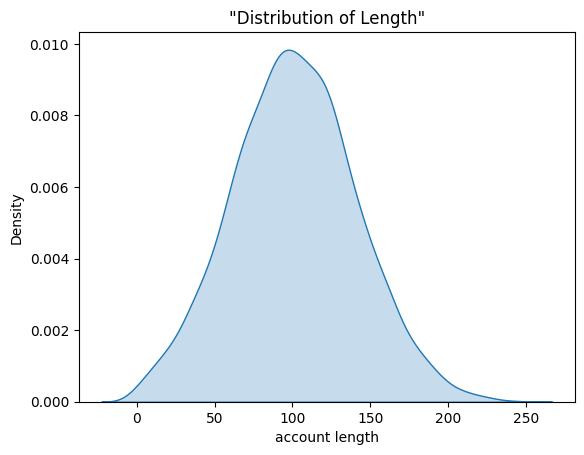

In [23]:
sns.kdeplot(df['account length'], fill = True)
plt.title('"Distribution of Length"');

__________
\- 'account lenght' feature is normally distributed, this mean most of the customer are between 50 to 150 days.
_________

In [24]:
df.groupby('churn')['account length'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
False,2850.0,100.793684,39.88235,1.0,73.0,100.0,127.0,243.0
True,483.0,102.664596,39.46782,1.0,76.0,103.0,127.0,225.0


___________
\- We can see that the average account length of people who churn is slightly less than those who don't churn.  
___________
\- The standard deviation shows that there is very little variation in account length between the two groups. 
___________
\- Hence, 'account length' does not have significant impact on churn.  
___________

In [25]:
from scipy.stats import f_oneway

def one_way_anova_for_churn(feature):
    """
    Perform one-way ANOVA to test the relationship between a numerical feature and churn.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the numerical feature to test.
    
    Returns:
    str: 'Has Relation' if the p-value is <= 0.05, otherwise 'No Relation'.
    """
    # Create groups based on the 'churn' feature
    group_false = df[df['churn'] == False][feature]
    group_true = df[df['churn'] == True][feature]
    
    # Perform the one-way ANOVA
    f_stat, p_value = f_oneway(group_false, group_true)
    
    # Return results
    if p_value <= 0.05:
        return 'Has Relation'
    return 'No Relation'

In [26]:
# One way anova to see relation with churn
one_way_anova_for_churn('account length')

'No Relation'

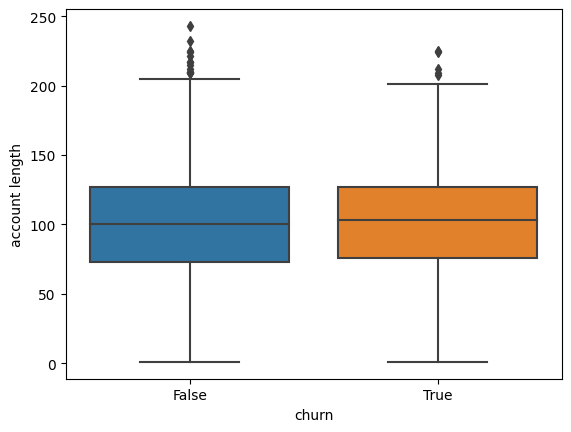

In [27]:
# relation of 'account lenght' feature with churn
sns.boxplot(data = df, x = 'churn', y = 'account length');

______
\- There is very liitle variation based upon churn. Very little correlation.
_____

In [28]:
df.corr()['churn'].loc['account length'] * 100

1.6540742243674176

_______
\- Lets check similar column which has very low correlation with 'churn'
_______

In [29]:
df.corr()['churn'] * 100

account length              1.654074
number vmail messages      -8.972797
total day minutes          20.515083
total day calls             1.845931
total day charge           20.515074
total eve minutes           9.279579
total eve calls             0.923313
total eve charge            9.278604
total night minutes         3.549285
total night calls           0.614120
total night charge          3.549556
total intl minutes          6.823878
total intl calls           -5.284434
total intl charge           6.825863
customer service calls     20.875000
churn                     100.000000
Name: churn, dtype: float64

_______
\- There are some column which has very low influence over churn, like account length (1.65%), total eve calls (0.92%), total night calls (0.61%). 
______

\- Lets see for other columns

In [30]:
columns = list(df.columns)
columns.remove('churn')

columns_to_remove = []

# Iterate over the columns and apply the one-way ANOVA function to numerical columns
for column in columns:
    if df[column].dtype != 'O':
        result = one_way_anova_for_churn(column)
        print(f"Feature: {column}, Result: {result}")
        
        if result == 'No Relation':
            columns_to_remove.append(column)

Feature: account length, Result: No Relation
Feature: number vmail messages, Result: Has Relation
Feature: total day minutes, Result: Has Relation
Feature: total day calls, Result: No Relation
Feature: total day charge, Result: Has Relation
Feature: total eve minutes, Result: Has Relation
Feature: total eve calls, Result: No Relation
Feature: total eve charge, Result: Has Relation
Feature: total night minutes, Result: Has Relation
Feature: total night calls, Result: No Relation
Feature: total night charge, Result: Has Relation
Feature: total intl minutes, Result: Has Relation
Feature: total intl calls, Result: Has Relation
Feature: total intl charge, Result: Has Relation
Feature: customer service calls, Result: Has Relation


In [31]:
# Removing columns which column result came 'No Relation'

df.drop(columns = columns_to_remove, inplace = True)

In [32]:
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,no,yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False
1,OH,no,yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False
2,NJ,no,no,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False
3,OH,yes,no,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False
4,OK,yes,no,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False


_________

**voice mail plan**

In [33]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

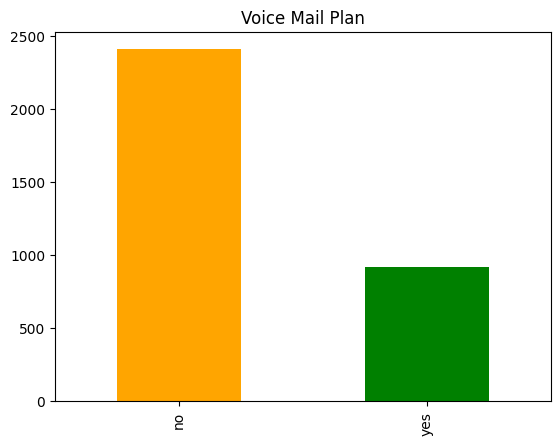

In [34]:
# univariate analysis

df['voice mail plan'].value_counts().plot(kind = 'bar', title = 'Voice Mail Plan', 
                                          color=['orange','green']); 

In [35]:
# bivariate analysis

df.pivot_table(index = 'voice mail plan', columns = 'churn', aggfunc = 'size') 

churn,False,True
voice mail plan,,
no,2008,403
yes,842,80


In [36]:
(403 / 2411) * 100 # no voice call

16.71505599336375

In [37]:
(80 / 922) * 100 # voice call

8.676789587852495

______
\- Customers with a voice mail plan have a significantly lower churn rate (8.6%) compared to those without a voice mail plan (16.7%). 
________
\- This suggests that having a voice mail plan is associated with higher customer retention.
_______

In [38]:
# chi square test

from scipy.stats import chi2_contingency

# Creating the data
data = {'Churn': ['No', 'Yes'],
        'No Voice Mail Plan': [2008, 403],
        'Voice Mail Plan': [842, 80]}
df2 = pd.DataFrame(data).set_index('Churn')

# Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(df2.T)

print("Chi-square statistic:", chi2)
print("P-value:", round(p_value, 3))

Chi-square statistic: 34.13166001075673
P-value: 0.0


_________
\- the p-value is less than 0.05 (at 5% significance level), we reject the null hypothesis, supporting the claim that having a voice mail plan is associated with a lower churn rate.
_________

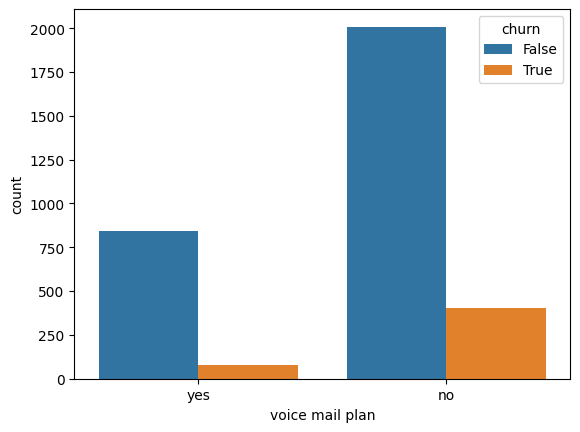

In [39]:
sns.countplot(data = df, x ='voice mail plan', hue = 'churn');

___________

**number vmail messages**

In [40]:
df[df['number vmail messages'] == 0].shape[0]

2411

_________
\- Nearly 2411 numbers have 0 vmail messages  
_________

\- These must be the people who dont have voice mail plan  
_______

In [41]:
# no voice mail plan and zero vmail message

df[(df['number vmail messages'] == 0) & (df['voice mail plan'] == 'no')].shape[0]

2411

In [42]:
# voice mail plan and zero vmail message, must be zero

df[(df['number vmail messages'] == 0) & (df['voice mail plan'] == 'yes')].shape[0]

0

In [43]:
# no voice mail plan but have some vmail message, must be zero

df[(df['number vmail messages'] != 0) & (df['voice mail plan'] == 'no')].shape[0]

0

In [44]:
vmail_df = df[(df['number vmail messages'] != 0)] # numbers with vmail and non zero vmail messages

vmail_df.shape[0]

922

In [45]:
vmail_df['number vmail messages'].describe()

count    922.000000
mean      29.277657
std        7.559027
min        4.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       51.000000
Name: number vmail messages, dtype: float64

____
\- The most of the people have around 20 to 40 vmails
_______

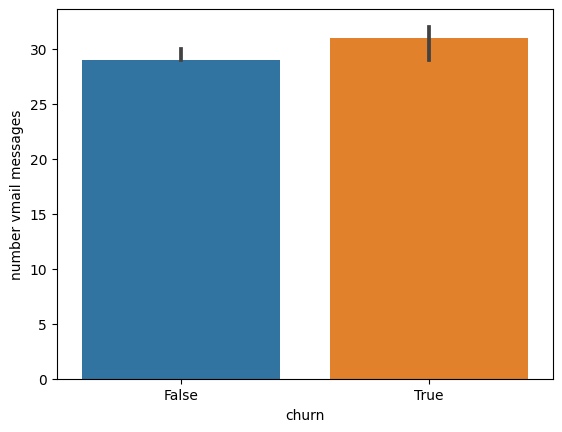

In [46]:
# bivariate analysis

sns.barplot(data = vmail_df, x = 'churn', y = 'number vmail messages', estimator = np.median);

_______
\- Voicemail plan status affects churn, but the number of voicemail messages doesn't seem important.
_______
\- We should remove the column for number of voicemail messages.
_______
\- We'll create models with and without this feature to decide if it's useful.
_______

**customer service calls**

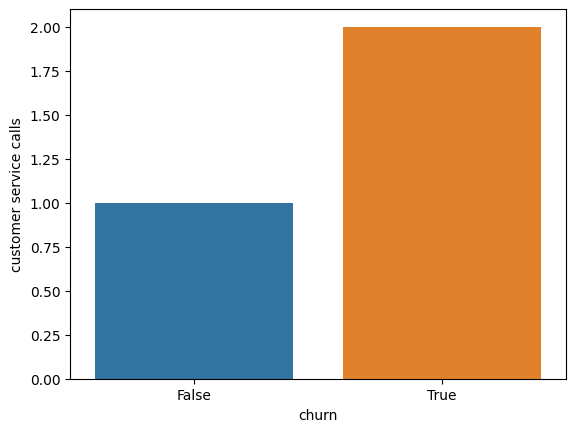

In [47]:
sns.barplot(data = df, x = 'churn', y = 'customer service calls', estimator = np.median);

In [48]:
df[df['customer service calls'] == 0].shape[0]

697

In [49]:
df[df['customer service calls'] != 0].shape[0]

2636

______
\- Out of 3333 people 697 people have not spoken with customer care.
_______

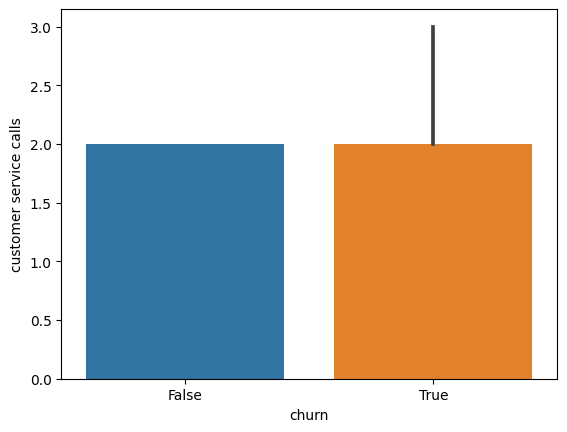

In [50]:
sns.barplot(data = df[df['customer service calls'] != 0], 
            x = 'churn', y = 'customer service calls', estimator = np.median);

______
\- The people who had spoken with customer care, 50% of it still churn.
_______
\- We can say that the people who contacting customer care are, their query is been satisfied only 50% of the time.
_______

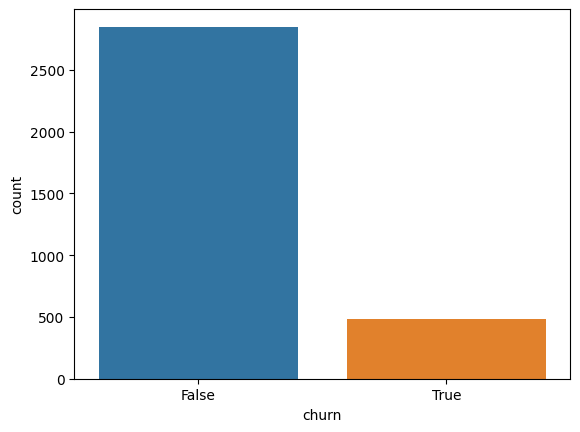

In [51]:
# Imbalanced dataset Treatment

sns.countplot(x='churn', data = df);

In [52]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

_______
\- Dataset is heavily imbalanced.
_______
\- Only around 483 entries of True
_______

In [53]:
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,no,yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False
1,OH,no,yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False
2,NJ,no,no,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False
3,OH,yes,no,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False
4,OK,yes,no,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False


_______
\- We are making a two new columns by summing up other columns
______

**total minutes**

In [54]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

df.drop(columns = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], inplace = True)

**total charge**

In [55]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], inplace = True)

In [56]:
df.head()

,state,international plan,voice mail plan,number vmail messages,total intl calls,customer service calls,churn,total minutes,total charge
0,KS,no,yes,25,3,1,False,717.2,75.56
1,OH,no,yes,26,3,1,False,625.2,59.24
2,NJ,no,no,0,5,0,False,539.4,62.29
3,OH,yes,no,0,7,2,False,564.8,66.80
4,OK,yes,no,0,3,3,False,512.0,52.09


## Model Building & Evaluation

In [57]:
# splitting the data into X and y

X = df.drop('churn', axis = 1)
y = df['churn']

In [58]:
# splitting the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical variables
ohe = OneHotEncoder(sparse_output = False, drop = 'first')  # drop ='first' to avoid multicollinearity

columns = ['state', 'international plan', 'voice mail plan']

X_train = ohe.fit_transform(X_train[columns].values)

X_test = ohe.transform(X_test[columns].values)

In [60]:
# label encoding 'churn' column using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)

In [61]:
# Selection of best working oversampler

In [62]:
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE) 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# List of oversampling techniques to evaluate  
oversamplers = [RandomOverSampler(random_state = 42), SMOTE(random_state = 42), ADASYN(random_state = 42),
                BorderlineSMOTE(random_state = 42), SVMSMOTE(random_state = 42)]

def oversample_train_eval(over_sampler, X_train, y_train):
    X_train, y_train = over_sampler.fit_resample(X_train, y_train)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test) #  test prediction
    print(f'{over_sampler.__class__.__name__} :\n')
    print('Classification Report:\n\n', classification_report(y_test, y_pred_test)) # confusion matrix
    print('___'*20)

In [63]:
for over_sampler in oversamplers:
    oversample_train_eval(over_sampler, X_train, y_train)

RandomOverSampler :

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.68      0.76       566
           1       0.21      0.48      0.29       101

    accuracy                           0.65       667
   macro avg       0.54      0.58      0.53       667
weighted avg       0.78      0.65      0.69       667

____________________________________________________________
SMOTE :

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.67      0.76       566
           1       0.21      0.50      0.29       101

    accuracy                           0.64       667
   macro avg       0.55      0.58      0.53       667
weighted avg       0.78      0.64      0.69       667

____________________________________________________________
ADASYN :

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.64      0.74       566


\- There is no diffrence between oversamplers, We can use any one.
_________
\- We will proceed with SMOTE

In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

In [65]:
def train_eval_model(model):
    
    '''
    This function train & Evaluate the given model
    
    '''
    model.fit(X_train, y_train) # training
    y_pred_test = model.predict(X_test) #  test prediction
    y_pred_train = model.predict(X_train) #  training prediction
    
    print('\n',type(model).__name__)
    
    print('=='*25)
    print('\nTraining Accuracy :', accuracy_score(y_train, y_pred_train)) # training accuracy
    print('\nTest Accuracy :', accuracy_score(y_test, y_pred_test)) # test accuracy
    print('__'*25)
    print('\nConfusion Matrix:\n\n', confusion_matrix(y_test, y_pred_test)) # confusion matrix
    print('__'*25)
    print('\nClassification Report: \n')
    
    return  classification_report(y_test, y_pred_test) # classification report

In [66]:
from sklearn.model_selection import GridSearchCV

def fine_tune(model, param_grid:dict, cv):
    
    '''
    Function to apply Cross Validation & Hyper parameter Tunning
    
    '''
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv,
                              n_jobs = -1, scoring = 'accuracy')
    
    grid_search.fit(X_train, y_train)
    
    print('Best Score: ',grid_search.best_score_)
    
    return f'Best Parameters : {grid_search.best_params_}' 

In [67]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

print(train_eval_model(log_reg))


 LogisticRegression

Training Accuracy : 0.6768826619964974

Test Accuracy : 0.6431784107946027
__________________________________________________

Confusion Matrix:

 [[377 189]
 [ 49  52]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       566
           1       0.22      0.51      0.30       101

    accuracy                           0.64       667
   macro avg       0.55      0.59      0.53       667
weighted avg       0.78      0.64      0.69       667



In [68]:
log_param_grid = {  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1','l2', 'elasticnet'],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  
    'max_iter': [100, 200, 300],  
    'tol': [1e-4, 1e-3],  
    'fit_intercept': [True, False]}

print(fine_tune(log_reg, log_param_grid, 3))

Best Score:  0.6792921732443027
Best Parameters : {'C': 100, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}


In [69]:
# kNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

print(train_eval_model(knn))


 KNeighborsClassifier

Training Accuracy : 0.694614711033275

Test Accuracy : 0.8260869565217391
__________________________________________________

Confusion Matrix:

 [[541  25]
 [ 91  10]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       566
           1       0.29      0.10      0.15       101

    accuracy                           0.83       667
   macro avg       0.57      0.53      0.53       667
weighted avg       0.77      0.83      0.79       667



In [70]:
knn_param_grid = { 'n_neighbors' : [5, 10, 15, 20], 'weights' : ['uniform','distance'],
                  'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size' : [30, 40, 50],
                  'p' : [1, 2]}

print(fine_tune(knn, knn_param_grid, 3))

Best Score:  0.6690071840481288
Best Parameters : {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [71]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

print(train_eval_model(dtc))


 DecisionTreeClassifier

Training Accuracy : 0.773861646234676

Test Accuracy : 0.7001499250374813
__________________________________________________

Confusion Matrix:

 [[434 132]
 [ 68  33]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       566
           1       0.20      0.33      0.25       101

    accuracy                           0.70       667
   macro avg       0.53      0.55      0.53       667
weighted avg       0.76      0.70      0.73       667



In [72]:
dtc_param_grid = {   
    'criterion': ["gini", "entropy", "log_loss"],   
    'splitter': ["best", "random"],  
    'max_depth': [5, 10, None],   
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2, 3],   
    'min_weight_fraction_leaf': [0.0, 0.2, 0.4],  
    'max_features': [2, 3, None],   
    'max_leaf_nodes': [10, 15, None],  
    'min_impurity_decrease': [0.0, 0.2],
    'ccp_alpha': [0.0, 0.02]}

print(fine_tune(dtc, dtc_param_grid, 3))

Best Score:  0.7467203852506565
Best Parameters : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [73]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

print(train_eval_model(nbc))


 GaussianNB

Training Accuracy : 0.6274080560420315

Test Accuracy : 0.4782608695652174
__________________________________________________

Confusion Matrix:

 [[253 313]
 [ 35  66]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.45      0.59       566
           1       0.17      0.65      0.28       101

    accuracy                           0.48       667
   macro avg       0.53      0.55      0.43       667
weighted avg       0.77      0.48      0.54       667



In [74]:
# Categorical Naive Bayes

from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()

print(train_eval_model(cnb))


 CategoricalNB

Training Accuracy : 0.6924255691768827

Test Accuracy : 0.5937031484257871
__________________________________________________

Confusion Matrix:

 [[336 230]
 [ 41  60]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.89      0.59      0.71       566
           1       0.21      0.59      0.31       101

    accuracy                           0.59       667
   macro avg       0.55      0.59      0.51       667
weighted avg       0.79      0.59      0.65       667



In [75]:
# Randon Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500)

print(train_eval_model(rfc))


 RandomForestClassifier

Training Accuracy : 0.773861646234676

Test Accuracy : 0.7001499250374813
__________________________________________________

Confusion Matrix:

 [[433 133]
 [ 67  34]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       566
           1       0.20      0.34      0.25       101

    accuracy                           0.70       667
   macro avg       0.53      0.55      0.53       667
weighted avg       0.77      0.70      0.73       667



In [76]:
rfc_param_grid = {  
    'n_estimators': [10, 50, 100],  
    'criterion': ['gini', 'entropy'],    
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  #
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'bootstrap': [True, False],   
    'oob_score': [True, False] }

print(fine_tune(rfc, rfc_param_grid, 3))

Best Score:  0.7471578301925592
Best Parameters : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10, 'oob_score': False}


In [77]:
# XG Boost

from xgboost import XGBClassifier
xgb = XGBClassifier()

print(train_eval_model(xgb))


 XGBClassifier

Training Accuracy : 0.7631348511383538

Test Accuracy : 0.671664167916042
__________________________________________________

Confusion Matrix:

 [[408 158]
 [ 61  40]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       566
           1       0.20      0.40      0.27       101

    accuracy                           0.67       667
   macro avg       0.54      0.56      0.53       667
weighted avg       0.77      0.67      0.71       667



In [79]:
xgb_param_grid = {  
    'n_estimators': [50, 100],  
    'max_depth': [3, 4, 5], 
    'learning_rate': [0.01, 0.05,],    
    'subsample': [0.6, 0.8, 1.0],    
    'min_child_weight': [1, 5, 10],  
    'gamma': [0, 0.1, 0.2, 0.3],   
    'objective': ['binary:logistic']}  

print(fine_tune(xgb, xgb_param_grid, 3))

Best Score:  0.7138800906181145
Best Parameters : {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.8}



\- From above various ml model we can see that xg-boost and random forest giving better result
_____________
\- We can use either of this model, for prediction.

In [80]:
## Pipeline